In [1]:
#特征评价关键代码
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# data = pd.read_excel('../data/data_preprocess_only_45.xlsx')
# del data['Unnamed: 0']
# label = data['Product_RON_loss']
# del data['Product_RON_loss']

In [3]:
data = pd.read_csv('../data/data_num_325_fea_reduce.csv') #164对应只做45的， 165对应small,large且做了45
data_RON = pd.read_csv('../data/data_num_325_correct.csv')
rf_multi_path = '../data/data_num_325_fea_30_rf_multi_labels.csv'
data['Product_RON'] = data_RON['Product_RON']
label = data[['Product_RON_loss', 'Product_S_content', 'Product_RON']]
del data['Unnamed: 0']
del data['Product_RON_loss']
del data['Product_RON']
del data['Product_S_content']

In [4]:
data.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Spent_C,Spent_S,Recycle_C,Recycle_S,...,S-ZORB.TE_1102.DACA,S-ZORB.AT-0001.DACA.PV,S-ZORB.AT-0003.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.FT_5102.DACA.PV,S-ZORB.CAL.LEVEL.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1504.DACA.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,229.548904,89.733538,52.676228,21.949782,54.526661,726.755265,3.030794,8.063265,1.507521,5.864193,...,426.623764,2.547025,1.131551,51.913266,43.675943,1917.403402,4843.993930,143.854913,2190.862732,2409.550662
std,65.752227,0.889764,4.584314,1.823616,6.818416,4.262181,1.722995,2.132002,0.966428,1.676606,...,1.759060,2.684052,1.147907,18.092283,48.877772,5287.204185,2359.134691,137.450504,418.047777,452.316109
min,57.000000,87.200000,43.240000,16.822222,36.520000,715.100000,1.010000,2.940000,0.250000,1.430000,...,420.898430,0.498255,0.447884,0.889900,0.000000,-4269.455900,0.000000,0.000000,979.564940,1222.663100
25%,185.000000,89.200000,49.610000,20.690000,48.750000,724.200000,1.850000,6.990000,0.933333,4.896667,...,426.075162,0.534488,0.464989,38.945485,0.000000,78.928243,4215.424100,0.000000,1887.742875,2329.794550
50%,240.285714,89.800000,53.250000,21.890000,53.980000,726.300000,2.390000,8.400000,1.280000,6.080000,...,427.171300,0.555710,0.472675,51.672012,64.004581,80.502553,5094.966775,142.936557,2177.557700,2538.538450
75%,271.428571,90.300000,56.100000,23.300000,60.190000,729.500000,3.610000,9.370000,1.670000,6.870000,...,427.171300,5.123928,1.391713,62.998978,67.964399,84.508473,6129.741900,203.804645,2496.749950,2702.628700
max,392.000000,91.700000,63.400000,26.200000,70.500000,738.700000,9.090000,14.310000,5.190000,10.630000,...,432.095332,7.155496,4.493657,106.657364,227.282440,18433.389250,11320.456750,589.154615,3334.904725,3104.564825


In [5]:
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
# data.describe()

In [6]:
features = data.columns.values.tolist()

In [7]:
# # CV ranking
# cv_feature_importance = [( column, np. std ( data [column])/abs(np.mean(data[column]))) for column in features ]
# cv_feature_importance.sort (key=lambda x: x [1], reverse =True)
# cv_sorted_attrs = [item[0] for item in cv_feature_importance ]
# cv_ranking = [ cv_sorted_attrs . index(x) + 1 for x in features ]
# print ("# CV result")
# # print (cv_ranking)
# # print ( cv_feature_importance )

In [8]:
# cv_feature_sort = []
# cv_feature_score = []
# for i in range(0, len(cv_feature_importance)):
#     cv_feature_sort.append(cv_feature_importance[i][0])
#     cv_feature_score.append(cv_feature_importance[i][1])

In [9]:
# data_cv = pd.DataFrame(data, columns = cv_feature_sort[0:30]) 
# data_cv['Product_RON_loss'] = label

In [10]:
# data_cv.describe()

In [11]:
# data_cv.to_excel('../data/cv_top_30_data_process_45_var_corr_168.xlsx')

In [12]:
# # -*- coding: utf-8 -*-
# import matplotlib.pyplot as plt
# plt.title('CV_Score(top 30)')
# plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
# plt.barh(cv_feature_sort[0:30], cv_feature_score[0:30],tick_label = cv_feature_sort[0:30])

# plt.tick_params(labelsize=8)
# plt.show()

In [13]:
# cv_feature_score

In [14]:
# #y_values = data [ target ]
# from scipy.stats import pearsonr
# y_values = y
# pearsonr_feature_impotance = [( column, pearsonr ( data[column], y_values) [0]) for column in features ]
# pearsonr_feature_impotance . sort (key=lambda x: abs(x [1]) , reverse =True)
# pearson_sorted_attrs = [item[0] for item in pearsonr_feature_impotance ]
# pearson_ranking = [ pearson_sorted_attrs . index(x) + 1 for x in features ]
# print ("# Pearson result")
# # print (pearson_ranking)
# # print ( pearsonr_feature_impotance )

In [15]:
# pearsonr_feature_impotance[0][0]

In [16]:
# pearsonr_feature_sort = []
# pearsonr_feature_score = []
# for i in range(0, len(pearsonr_feature_impotance)):
#     pearsonr_feature_sort.append(pearsonr_feature_impotance[i][0])
#     pearsonr_feature_score.append(pearsonr_feature_impotance[i][1])

In [17]:
# plt.title('Pearsonr_Score(top 30)')
# plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
# plt.barh(pearsonr_feature_sort[0:30], pearsonr_feature_score[0:30],tick_label = pearsonr_feature_sort[0:30])

# plt.tick_params(labelsize=8)
# plt.show()

In [18]:
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
# data.describe()

In [19]:
# RF (Random Forest) feature ranking
from sklearn .ensemble import RandomForestRegressor
y_values = label
rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rf.fit ( data.loc [:, features], y_values)
rf_scores = rf.feature_importances_
# print (rf_scores)

In [20]:
rf_feature_importance = []
for i in range(0, len(features)):
    rf_feature_importance.append((features[i], rf_scores[i]))
rf_feature_importance.sort(key=lambda x: (-x[1], x[0]))

In [21]:
# rf_feature_importance

In [22]:
rf_feature_sort = []
rf_feature_score = []
for i in range(0, len(rf_feature_importance)):
    rf_feature_sort.append(rf_feature_importance[i][0])
    rf_feature_score.append(rf_feature_importance[i][1])

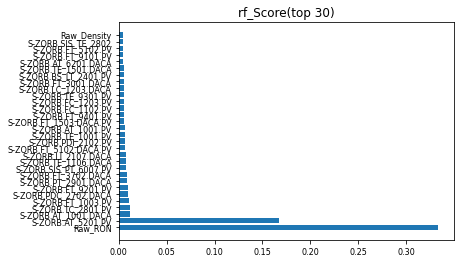

In [23]:
plt.title('rf_Score(top 30)')
plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
plt.barh(rf_feature_sort[0:30], rf_feature_score[0:30],tick_label = rf_feature_sort[0:30])

plt.tick_params(labelsize=8)
plt.show()

In [24]:
data_range = pd.read_csv('../data/data_range.csv', index_col = 0)

In [25]:
# data_range = data_range.T

In [26]:
# data_rf = pd.DataFrame(data, columns = rf_feature_sort[0:30])
# data_rf = data_rf.T
# data_rf['feature_importance'] = rf_feature_score[0:30]

# data_rf['Product_RON_loss'] = label

In [27]:
data_rf_save = pd.DataFrame(data, columns = rf_feature_sort[0:30])
data_rf_save['Product_RON_loss'] = label['Product_RON_loss']
data_rf_save['Product_S_content'] = label['Product_S_content']
data_rf_save['Product_RON'] = label['Product_RON']
data_rf_save

,Raw_RON,S-ZORB.AT_5201.PV,S-ZORB.AT_1001.DACA,S-ZORB.TC_2801.PV,S-ZORB.FT_1003.PV,S-ZORB.PDC_2702.DACA,S-ZORB.FT_9201.PV,S-ZORB.PT_2901.DACA,S-ZORB.FT_3702.DACA,S-ZORB.SIS_PT_6007.PV,...,S-ZORB.BS_LT_2401.PV,S-ZORB.TE_1501.DACA,S-ZORB.AT_6201.DACA,S-ZORB.FT_9101.PV,S-ZORB.FT_5102.PV,S-ZORB.SIS_TE_2802,Raw_Density,Product_RON_loss,Product_S_content,Product_RON
0,90.6,-0.110001,130.358250,272.367985,46.481673,28.516062,397.265200,511.160055,42.506640,-1133.409600,...,17.562831,21.478113,-40.450741,2.113980,121.907800,273.237180,726.085714,1.38,3.2,89.22
1,90.5,0.241799,139.992470,281.072710,43.810887,28.925232,398.995980,522.763125,42.166220,-1132.402400,...,17.555199,21.160752,-40.373416,0.462973,121.907800,282.043645,731.300000,1.18,3.2,89.32
2,90.7,-0.040036,139.878080,272.924330,44.432956,27.845434,402.394630,530.525395,41.537158,-1150.025500,...,23.027066,21.202195,-40.653406,0.219469,121.907800,274.166670,729.614286,1.38,3.2,89.32
3,90.4,-0.199544,127.938755,269.141545,50.417609,29.120041,398.369810,530.351410,34.625504,-1174.542050,...,22.011853,21.081283,-40.394810,2.465471,121.907800,270.070205,725.400000,1.38,3.2,89.02
4,89.6,-0.187086,128.254285,267.033390,52.706893,27.150673,398.890970,524.028675,37.327574,-1188.822750,...,23.178164,21.131535,-40.555169,0.214853,121.907800,268.022000,725.428571,1.28,3.2,88.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,89.2,1.560697,225.020775,290.046320,53.971415,29.834679,478.766410,549.208265,9.878017,-1241.379225,...,42.405881,22.422047,-40.489959,6.020366,121.907800,281.829207,725.200000,1.15,3.2,88.05
321,89.2,2.037648,224.013005,286.308350,53.834302,26.812309,481.129270,545.920045,45.250794,-1290.470375,...,44.136268,21.932511,-40.473219,5.998378,70.896823,278.364843,725.200000,1.25,3.2,87.95
322,89.4,0.803333,213.336115,288.879765,53.551120,25.543698,480.984932,549.523365,0.045580,-1260.148450,...,42.071570,21.802443,-40.529104,6.054638,3.665722,281.358248,725.200000,1.35,3.2,88.05
323,89.4,0.773961,208.649452,284.760735,52.924469,25.501970,480.829800,544.395062,0.013843,-1282.298000,...,38.429146,21.812414,-40.519784,6.200266,20.237576,274.248608,730.000000,1.28,3.6,88.12


In [28]:
data_rf_save.to_csv(rf_multi_path)

In [29]:
data_rf_importance = pd.DataFrame(data, columns = rf_feature_sort[0:30])
data_rf_importance.drop(data_rf_importance.index, inplace=True)

In [30]:
data_rf_importance = data_rf_importance.T
data_rf_importance['feature_importance'] = rf_feature_score[0:30]


In [31]:
# data_range = data_range.T

In [32]:
data_range

,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PT_2101.PV,S-ZORB.PDT_2104.PV,S-ZORB.SIS_PDT_2103B.PV,S-ZORB.TC_2101.PV,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
name,氢油比,反应过滤器压差,还原器压力,还原器流化氢气流量,反应器上部温度,反应器底部温度,反应器顶部压力,反应器顶底压差,反应过滤器压差,反吹氢气温度,...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口,D101原料缓冲罐压力
range,0.20-0.37,10-35,2.35-2.70,600-1000,410-435,399-430,2.25-2.55,50-110,8-1500,165-250,...,1.2-3.6,0-12000,0-2500,0-150000000,30000-3000000,60-5500000,0-40000000,-14000-3500,0-40000000,-125-0.5
unit,NaN,KPa,MPa,Nm3/h,℃,℃,MPa,KPa,KPa,℃,...,t,NaN,kg/h,NaN,kg/h,NaN,NaN,NaN,NaN,NaN
delta,0.01,1.0,0.1,50.0,1.0,1.0,0.1,5.0,100.0,2.0,...,0.2,100.0,100.0,10000.0,10000.0,10000.0,10000.0,1000.0,10000.0,0.5
r1,0.2,10.0,2.35,600.0,410.0,399.0,2.25,50.0,8.0,165.0,...,1.2,0.0,0.0,0.0,30000.0,60.0,0.0,-14000.0,0.0,-125.0
r2,0.37,35.0,2.7,1000.0,435.0,430.0,2.55,110.0,1500.0,250.0,...,3.6,12000.0,2500.0,150000000.0,3000000.0,5500000.0,40000000.0,3500.0,40000000.0,0.5


In [33]:
data_rf_importance = data_rf_importance.T

In [34]:
#
# data_rf_importance.drop('Raw_RON', inplace = True)
# data_rf_importance.drop('Raw_Saturated_hydrocarbon', inplace = True)
# data_rf_importance.drop('Recycle_S', inplace = True)

# column_create = ['Raw_S_content', 'Raw_RON', 'Raw_Saturated_hydrocarbon','Raw_Olefins', 'Raw_Aromatics', 'Raw_Bromine_value', 'Raw_Density', 'Product_S_content', 'Product_RON', 'Product_RON_loss', 'Spent_C', 'Spent_S', 'Recycle_C', 'Recycle_S']
for col in data_rf_importance.columns:
    if not col.startswith("S-"):
        data_rf_importance.drop(col,1, inplace = True)

In [35]:
data_rf_importance

,S-ZORB.AT_5201.PV,S-ZORB.AT_1001.DACA,S-ZORB.TC_2801.PV,S-ZORB.FT_1003.PV,S-ZORB.PDC_2702.DACA,S-ZORB.FT_9201.PV,S-ZORB.PT_2901.DACA,S-ZORB.FT_3702.DACA,S-ZORB.SIS_PT_6007.PV,S-ZORB.TE_1106.DACA,...,S-ZORB.FC_1203.PV,S-ZORB.TE_9301.PV,S-ZORB.LC_1203.DACA,S-ZORB.FT_3001.DACA,S-ZORB.BS_LT_2401.PV,S-ZORB.TE_1501.DACA,S-ZORB.AT_6201.DACA,S-ZORB.FT_9101.PV,S-ZORB.FT_5102.PV,S-ZORB.SIS_TE_2802
feature_importance,0.167259,0.012028,0.011962,0.011003,0.010097,0.009643,0.008595,0.008154,0.007842,0.007492,...,0.005403,0.005317,0.005133,0.005005,0.00495,0.004941,0.004788,0.004765,0.004713,0.004446


In [36]:
# data_rf_importance = data_rf_importance.T

In [37]:
data_range_importance = data_range[data_rf_importance.columns.values.tolist()]

In [38]:
data_range_importance = data_range_importance.T

In [39]:
data_range_importance

,name,range,unit,delta,r1,r2
S-ZORB.AT_5201.PV,精制汽油出装置硫含量,0-5,μg/g,1.0,0.0,5.0
S-ZORB.AT_1001.DACA,原料汽油硫含量,1.5-645,NaN,10.0,1.5,645.0
S-ZORB.TC_2801.PV,还原器温度,200-350,℃,1.0,200.0,350.0
S-ZORB.FT_1003.PV,2#催化汽油进装置流量,0-75,t/h,5.0,0.0,75.0
S-ZORB.PDC_2702.DACA,再生器底部与再生接收器压差,10-40,NaN,5.0,10.0,40.0
S-ZORB.FT_9201.PV,循环水进装置流量,250-900,kg/h,50.0,250.0,900.0
S-ZORB.PT_2901.DACA,ME-103反吹气总管压力,485-590,NaN,1.0,485.0,590.0
S-ZORB.FT_3702.DACA,闭锁料斗H2过滤器出口气流量,0-60,NaN,5.0,0.0,60.0
S-ZORB.SIS_PT_6007.PV,空气预热器烟气出口压力,-1500-（-100）,Pa,100.0,-1500.0,-100.0
S-ZORB.TE_1106.DACA,E-101A壳程出口管温度,100-200,℃,1.0,100.0,200.0


In [40]:
data_range_importance['feature_importance'] = data_rf_importance.T['feature_importance']
data_range_importance

,name,range,unit,delta,r1,r2,feature_importance
S-ZORB.AT_5201.PV,精制汽油出装置硫含量,0-5,μg/g,1.0,0.0,5.0,0.167259
S-ZORB.AT_1001.DACA,原料汽油硫含量,1.5-645,NaN,10.0,1.5,645.0,0.012028
S-ZORB.TC_2801.PV,还原器温度,200-350,℃,1.0,200.0,350.0,0.011962
S-ZORB.FT_1003.PV,2#催化汽油进装置流量,0-75,t/h,5.0,0.0,75.0,0.011003
S-ZORB.PDC_2702.DACA,再生器底部与再生接收器压差,10-40,NaN,5.0,10.0,40.0,0.010097
S-ZORB.FT_9201.PV,循环水进装置流量,250-900,kg/h,50.0,250.0,900.0,0.009643
S-ZORB.PT_2901.DACA,ME-103反吹气总管压力,485-590,NaN,1.0,485.0,590.0,0.008595
S-ZORB.FT_3702.DACA,闭锁料斗H2过滤器出口气流量,0-60,NaN,5.0,0.0,60.0,0.008154
S-ZORB.SIS_PT_6007.PV,空气预热器烟气出口压力,-1500-（-100）,Pa,100.0,-1500.0,-100.0,0.007842
S-ZORB.TE_1106.DACA,E-101A壳程出口管温度,100-200,℃,1.0,100.0,200.0,0.007492


In [41]:
data_range_importance = data_range_importance.T

In [42]:
data_range_importance.to_csv(rf_multi_path)

In [43]:
data_range_importance

,S-ZORB.AT_5201.PV,S-ZORB.AT_1001.DACA,S-ZORB.TC_2801.PV,S-ZORB.FT_1003.PV,S-ZORB.PDC_2702.DACA,S-ZORB.FT_9201.PV,S-ZORB.PT_2901.DACA,S-ZORB.FT_3702.DACA,S-ZORB.SIS_PT_6007.PV,S-ZORB.TE_1106.DACA,...,S-ZORB.FC_1203.PV,S-ZORB.TE_9301.PV,S-ZORB.LC_1203.DACA,S-ZORB.FT_3001.DACA,S-ZORB.BS_LT_2401.PV,S-ZORB.TE_1501.DACA,S-ZORB.AT_6201.DACA,S-ZORB.FT_9101.PV,S-ZORB.FT_5102.PV,S-ZORB.SIS_TE_2802
name,精制汽油出装置硫含量,原料汽油硫含量,还原器温度,2#催化汽油进装置流量,再生器底部与再生接收器压差,循环水进装置流量,ME-103反吹气总管压力,闭锁料斗H2过滤器出口气流量,空气预热器烟气出口压力,E-101A壳程出口管温度,...,D121去稳定塔流量,1.0MPa蒸汽进装置温度,D-121水液位,D-113顶放空线流量,闭锁料斗液位,D-122入口管温度,非净化风干燥后露点温度,污油出装置,NaN,D-102温度
range,0-5,1.5-645,200-350,0-75,10-40,250-900,485-590,0-60,-1500-（-100）,100-200,...,5-15,150-250,35-55,15-250,2.5-62.5,20-30,-50-20,0-85,0-450,250-350
unit,μg/g,NaN,℃,t/h,NaN,kg/h,NaN,NaN,Pa,℃,...,t/h,℃,%,NaN,NaN,℃,℃,t/h,NaN,℃
delta,1.0,10.0,1.0,5.0,5.0,50.0,1.0,5.0,100.0,1.0,...,1.0,1.0,2.0,10.0,5.0,1.0,1.0,5.0,10.0,1.0
r1,0.0,1.5,200.0,0.0,10.0,250.0,485.0,0.0,-1500.0,100.0,...,5.0,150.0,35.0,15.0,2.5,20.0,-50.0,0.0,0.0,250.0
r2,5.0,645.0,350.0,75.0,40.0,900.0,590.0,60.0,-100.0,200.0,...,15.0,250.0,55.0,250.0,62.5,30.0,20.0,85.0,450.0,350.0
feature_importance,0.167259,0.0120277,0.0119624,0.0110031,0.0100967,0.00964331,0.0085953,0.0081537,0.00784155,0.00749173,...,0.00540301,0.00531743,0.00513263,0.00500452,0.00494952,0.00494129,0.00478822,0.00476457,0.00471282,0.00444616


In [44]:
# data_rf.to_excel('../data/rf_top_30_data_preprocess_45.xlsx')

In [45]:
# # MIC (Maximal Information Coefficient ) feature ranking
# from minepy import MINE

# mine = MINE()
# mic_scores = []
# data_s = data.sample(frac =0.001)
# print (data_s.shape)
# # for attr in features :
# #     print(attr)
# mine.compute_score(data_s.loc [:, attr], y_values)
# mic_scores.append(mine.mic())
# mic_result = sorted ( list ( zip ( features , mic_scores) ) , key=operator . itemgetter (1) , reverse =True)
# mic_sorted_attrs = [x[0] for x in mic_result ]
# mic_ranking = [ mic_sorted_attrs . index(x) + 1 for x in features ]
# # print ("# MIC result")
# # print ( mic_sorted_attrs )
# # print (mic_ranking)

In [46]:
# # Catboost feature ranking
# import catboost as cat
# import sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import r2_score
# train_data, test_data, train_y, test_y = train_test_split(data, label, test_size = 0.3)
# # eval_set = list(test_y)

In [47]:
# crf = cat.CatBoostRegressor(
# iterations =1200,
# depth=10,
# learning_rate =0.02,
# verbose=100,
# loss_function ='RMSE',
# eval_metric ='RMSE',
# # early_stopping_rounds =100,
# random_seed=2019,
# # task_type='GPU'
# # bootstrap_type ='Poisson',
# # devices='0'
# )
# crf.fit (train_data, train_y, eval_set = (test_data, test_y)) 
# cat_ranking = [( y, x) for x, y in zip( data .columns, crf.feature_importances_ )]
# cat_ranking.sort()
# # print(cat_ranking )

In [48]:
# pred = crf.predict(test_data)

In [49]:
# cat_ranking.sort(reverse = True)

In [50]:
# # cat_ranking
# import sklearn
# sklearn.metrics.mean_squared_error(pred, test_y)

In [51]:
# cat_feature_sort = []
# cat_feature_score = []
# for i in range(0, len(cat_ranking)):
#     cat_feature_sort.append(cat_ranking[i][1])
#     cat_feature_score.append(cat_ranking[i][0])

In [52]:
# plt.title('Catboost_Score(top 30)')
# plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
# plt.barh(cat_feature_sort[0:30], cat_feature_score[0:30],tick_label = cat_feature_sort[0:30])

# plt.tick_params(labelsize=8)
# plt.show()

In [53]:
# data_cat = pd.DataFrame(data, columns = cat_feature_sort[0:5])
# data_cat['Product_RON_loss'] = label

In [54]:
# data_cat.to_excel('../data/cat_top_5_data_preprocess_45.xlsx')
# data_cat

In [55]:
# import missingno as msno
# msno.matrix(data);